In [3]:
import sys
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
#Load the data
games = pandas.read_csv('games.csv')

In [5]:
#Print the names of the columns and the dimensions of the dataset
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


In [6]:
#Different types of games and their frequencies
games['type'].value_counts()

boardgame             70820
boardgameexpansion    10492
Name: type, dtype: int64

In [7]:
#Applying label encoder for the 'type' column since it is categorical
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
games.iloc[:, 1] = labelEncoder.fit_transform(games.iloc[:, 1])

In [8]:
#Verify the label encoding
df = pandas.DataFrame(games)
print(df['type'].head())

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64


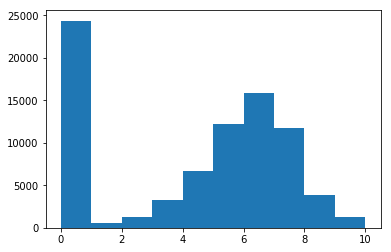

In [9]:
#Making a histogram of the average_rating column
plt.hist(games['average_rating']);
plt.show()

In [10]:
#Print the first 5 rows of all the games with zero ratings
print(games[games['average_rating']==0].head())

        id  type           name  yearpublished  minplayers  maxplayers  \
13048  318     0     Looney Leo            0.0         0.0         0.0   
13068  579     0  Field of Fire         2002.0         2.0         0.0   
13114  894     0      LifeLinks         2000.0         1.0         8.0   
13116  897     0      Dear Abby         1992.0         3.0         4.0   
13124  946     0       Rolazone         1999.0         2.0         2.0   

       playingtime  minplaytime  maxplaytime  minage  users_rated  \
13048          0.0          0.0          0.0     0.0            0   
13068          0.0          0.0          0.0    12.0            0   
13114         10.0         10.0         10.0     8.0            0   
13116         60.0         60.0         60.0    13.0            0   
13124         30.0         30.0         30.0     0.0            0   

       average_rating  bayes_average_rating  total_owners  total_traders  \
13048             0.0                   0.0             0       

In [11]:
#Print the first 5 rows of all the games with non-zero scores
print(games[games['average_rating']>0].head())

       id  type                                       name  yearpublished  \
0   12333     0                          Twilight Struggle         2005.0   
1  120677     0                              Terra Mystica         2012.0   
2  102794     0                  Caverna: The Cave Farmers         2013.0   
3   25613     0  Through the Ages: A Story of Civilization         2006.0   
4    3076     0                                Puerto Rico         2002.0   

   minplayers  maxplayers  playingtime  minplaytime  maxplaytime  minage  \
0         2.0         2.0        180.0        180.0        180.0    13.0   
1         2.0         5.0        150.0         60.0        150.0    12.0   
2         1.0         7.0        210.0         30.0        210.0    12.0   
3         2.0         4.0        240.0        240.0        240.0    12.0   
4         2.0         5.0        150.0         90.0        150.0    12.0   

   users_rated  average_rating  bayes_average_rating  total_owners  \
0        2

In [12]:
#Remove the observations which have not been rated by any user
games = games[games['users_rated']>0]

#Remove the observations with missing values
games.dropna(axis = 0, inplace = True)

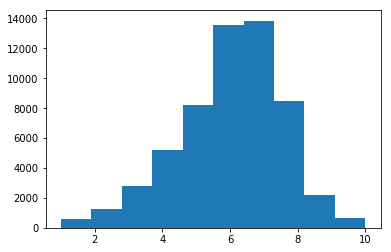

In [13]:
#Making a histogram of the average_rating column
plt.hist(games['average_rating']);
plt.show()

In [14]:
#Correlation matrix
corrmat = games.corr()

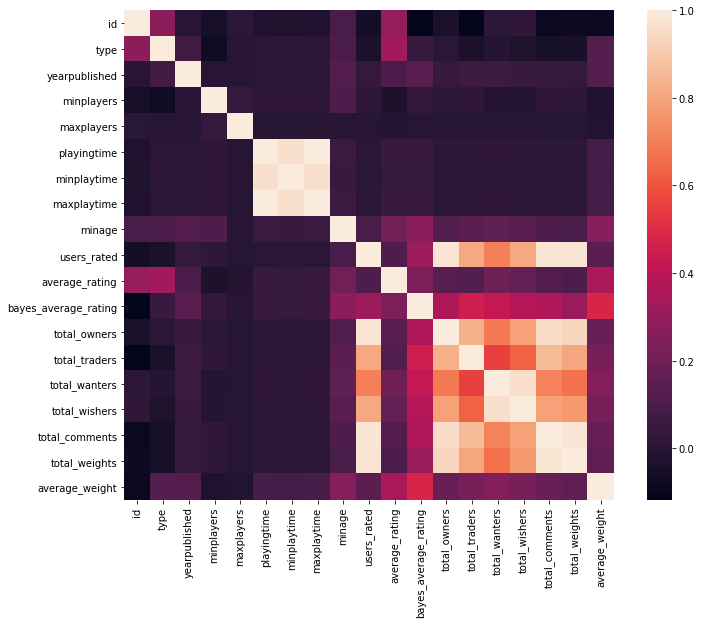

In [15]:
#Make a heat map by making use of the correlation matrix
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, square = True);

In [16]:
#Print all the columns in the dataset as a Python list
print(games.columns.tolist())

['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [17]:
#Filter the columns to remove the data that we do not need
columns = [c for c in games.columns if c not in ['bayes_average_rating', 'average_rating', 'name', 'id']]

#Store the variable to be precicted
target = 'average_rating'

In [18]:
#Generate training and test datasets
from sklearn.model_selection import train_test_split

#Generating the training set
train = games.sample(frac = 0.8, random_state = 1)

#Generating the test set
test = games.loc[~games.index.isin(train.index)]

In [19]:
print("Train: ", train.shape)

Train:  (45515, 20)


In [20]:
#Import the linear regression model and random forest model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [21]:
#Linear Regression model
lin_reg = LinearRegression()

#Fit the linear regression model
lin_reg.fit(train[columns], train[target])

#Generate predictions for the test set
pred = lin_reg.predict(test[columns])

#Compute the error between the actual values and the predicted values
mean_squared_error(test[target], pred)

1.8946970739243956

In [22]:
#Random Forest model
random_forest = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

#Fit the random forest model
random_forest.fit(train[columns], train[target])

#Generate predictions for the test set
pred = random_forest.predict(test[columns])

#Compute the error between the actual values and the predicted values
mean_squared_error(test[target], pred)

1.4109015812880967

In [23]:
#Consider the first observation in the test set
print(test[columns].iloc[0])

type                  0.0000
yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64


In [26]:
#Make predictions with both the models
pred_lin_reg = lin_reg.predict(test[columns].iloc[0].values.reshape(1, -1))
pred_random_forest = random_forest.predict(test[columns].iloc[0].values.reshape(1, -1))

#Print the predictions
print("Linear Regression model rating: ", round(pred_lin_reg[0],5))
print("Random Forest model rating: ", round(pred_random_forest[0],5))
print("Actual rating: ", test[target].iloc[0])

Linear Regression model rating:  9.17206
Random Forest model rating:  7.96949
Actual rating:  8.07933
